In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

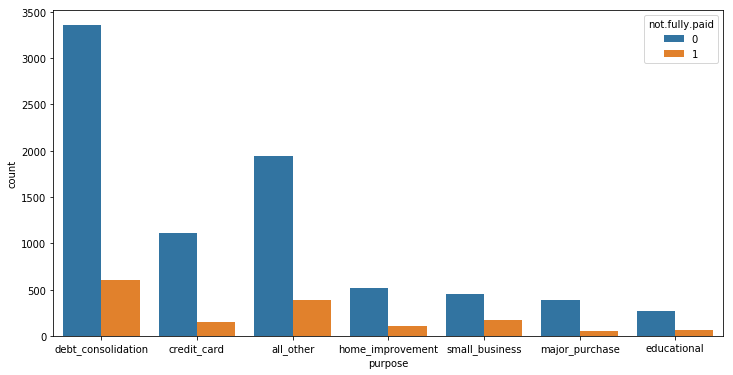

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="purpose",hue='not.fully.paid')

Purpose of the loan and not fully paid graphs.
 Most counts are seen for "debt_consolidation" and "not.fully.paid" 

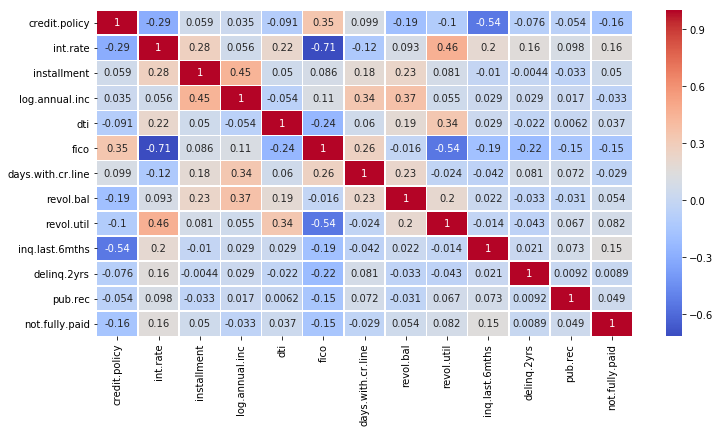

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr() ,cmap ='coolwarm',cbar=True,annot=True,linewidths=.5)
plt.show()

"revol, util", "installment" ,"pub.rec" and "dti" in moderately correlated  

"delinq.2yrs" is not correlate to "not.fully.paid"

In [7]:
df.corr()['not.fully.paid'].sort_values(ascending = False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

summary of co-relation with "not.fully.paid"

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return n

Text(0.5,1,'int.rate Distribution')

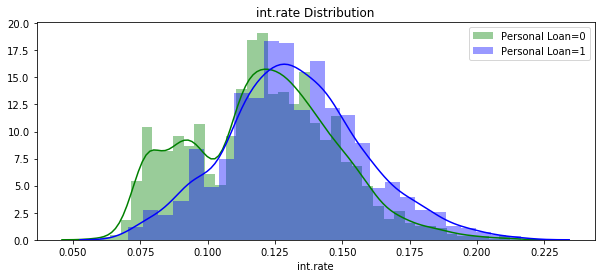

In [8]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["not.fully.paid"] == 0]['int.rate'], color = 'g',label='Personal Loan=0')
sns.distplot(df[df["not.fully.paid"] == 1]['int.rate'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("int.rate Distribution")

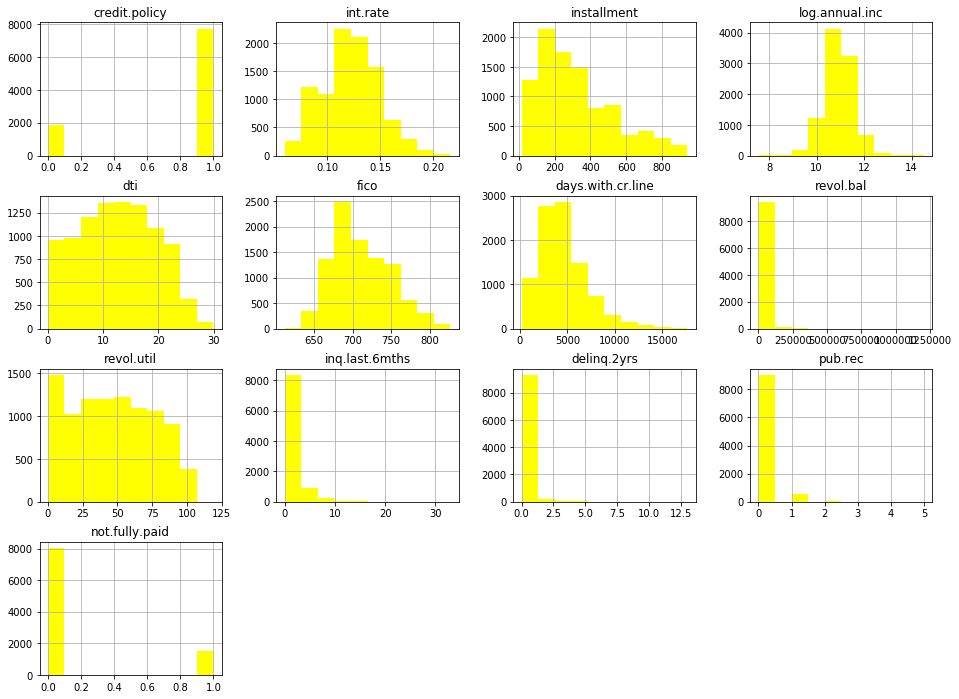

In [9]:
df.hist(bins=10 ,figsize=(16,12), color = 'Yellow')
plt.show()

In [10]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

Checking the number of unique values in each features

In [11]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


0    8045
1    1533
Name: not.fully.paid, dtype: int64

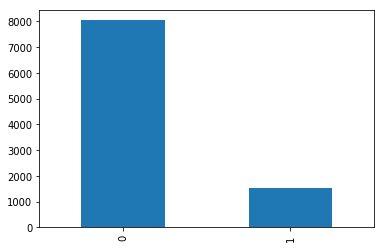

In [12]:
df['not.fully.paid'].value_counts().plot(kind= 'bar')
print()
df['not.fully.paid'].value_counts()

In [13]:
zeros=(df["not.fully.paid"].value_counts()[0]*100)/len(df)
ones=(df["not.fully.paid"].value_counts()[1]*100)/len(df)
print(f' The percentage of zero = {zeros}')
print(f' The percentage of one = {ones}')

 The percentage of zero = 83.99457089162665
 The percentage of one = 16.005429108373356


The data is imbalanced . Therefore we will use under sampling technique

In [14]:
df=pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [15]:
df_final=df.drop(["delinq.2yrs","credit.policy"],axis=1)
#Dropping the least co-related feature

In [16]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [17]:
X=df_final.drop(["not.fully.paid"],axis=1)
y=df_final["not.fully.paid"]

In [18]:
print(X.shape)
print(y.shape)

(9578, 16)
(9578,)


# Splitting the data and enabling the stratify

In [19]:
# splitting the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)

In [20]:
X_train.shape

(7662, 16)

# Normalising the final dataset for the model

In [21]:
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()

In [22]:
X_train=Std.fit_transform(X_train)
X_test=Std.fit_transform(X_test)

# Deep Learning Model

In [23]:
#building model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [24]:
train_x = np.asarray(X_train)
test_x = np.asarray(X_test)
train_y=np.asarray(y_train)
test_y=np.asarray(y_test)

In [25]:
#creating model
model=Sequential()

model.add(Dense(60,activation='relu',input_dim = 16))
# Hidden layers
model.add(Dense(60,activation='relu',name="Hidden1"))
model.add(Dense(30,activation='relu',name="Hidden2"))
#output layer
model.add(Dense(1,activation='sigmoid'))
#compile the model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

model_history=model.fit(train_x, train_y, batch_size = 10, epochs = 100)

Train on 7662 samples
Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
7662/7662 [==============================] - 4s 586us/sample - loss: 0.4305 - accuracy: 0.8395
Epoch 2/100
7662/7662 [==============================] - 3s 345us/sample - loss: 0.4123 - accuracy: 0.8392
Epoch 3/100
7662/7662 [==============================] - 3s 388us/sample - loss: 0.4087 - accuracy: 0.8405
Epoch 4/100
7662/7662 [==============================] - 4s 480us/sample - loss: 0.4053 - accuracy: 0.8408
Epoch 5/100
7662/7662 [==============================] - 3s 344us/sample - loss: 0.4022 - accuracy: 0.8426
Epoch 6/100
7662/7662 [==============================] - 1s 163us/sample - loss: 0.3996 - accuracy: 0.8429
Epoch 7/100
7662/7662 [==============================] - 1s 150us/sample - loss: 0.3961 - accuracy: 0.8426
Epoch 8/100
7662/7662 [==============================] - 1s 144us/sample - loss: 0.3929 - accuracy: 0.8444
Epoch 9/100
7662/7662 [=====

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                1020      
_________________________________________________________________
Hidden1 (Dense)              (None, 60)                3660      
_________________________________________________________________
Hidden2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 6,541
Trainable params: 6,541
Non-trainable params: 0
_________________________________________________________________


<function matplotlib.pyplot.show(*args, **kw)>

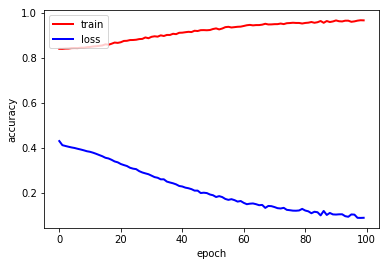

In [27]:
plt.plot(model_history.history['accuracy'], 'r-', label = 'accuracy', linewidth=2)
plt.plot(model_history.history['loss'], 'blue', label = 'loss', linewidth=2)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show

# Accuracy can be seen 96 percent for the model and now we check for test data

In [28]:
y_pred=model.predict(test_x)
y_pred = (y_pred > 0.5)


In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7734864300626305

# Accuracy score for the test data set is 77 percent approx